# House Price Prediction using Linear, Ridge and Lasso Regression

## Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

## Business goal of the assignment:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## The solution is divided into the following sections: 
1. Data understanding and exploration
2. Data cleaning
3. Data preparation
4. Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


/home/sreehari/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# reading the dataset
house = pd.read_csv("train.csv")

In [3]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# summary of the dataset: 1460 rows, 81 columns
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Checking % of Null values
round(100*(house.isnull().sum()/len(house.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [7]:
# Since we have 81 columns, lets print only the ones with null values

nan_cols = [i for i in house.columns if house[i].isnull().any()]
# null_cols = [i for i in house.columns if house[i].isnull().sum() > 0*len(house)]
for i in nan_cols:
    print(i,house[i].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


### 2. Data Cleaning

We see that there are lots of Null values. 
We can observe the data dictionary and understand that they are actually not missing values

For example:
Alley column has 3 values: 
1. Grvl = Gravel
2. Pave	= Paved
3. NA =	No alley access

Hence we can fill them with actual meaning, in this case 'No Alley'


In [8]:
house['Alley'].fillna('No Alley', inplace=True)

In [9]:
#Similarly we can replace null values of the other columns with their meaningful catogorical value: 
house['BsmtQual'].fillna('None', inplace=True)
house['BsmtCond'].fillna('None', inplace=True)
house['BsmtExposure'].fillna('None', inplace=True)
house['BsmtFinType1'].fillna('None', inplace=True)
house['BsmtFinType2'].fillna('None', inplace=True)
house['FireplaceQu'].fillna('None', inplace=True)
house['GarageType'].fillna('None', inplace=True)
house['GarageFinish'].fillna('None', inplace=True)
house['GarageQual'].fillna('None', inplace=True)
house['GarageCond'].fillna('None', inplace=True)
house['PoolQC'].fillna('None', inplace=True)
house['Fence'].fillna('None', inplace=True)
house['MiscFeature'].fillna('None', inplace=True)
house['GarageYrBlt'].fillna(2019, inplace=True)
house['MasVnrType'].fillna('None', inplace=True)

In [10]:
#lets print remaining columns with null values
nan_cols = [i for i in house.columns if house[i].isnull().any()]
for i in nan_cols:
    print(i,house[i].isnull().sum())

LotFrontage 259
MasVnrArea 8
Electrical 1


In [11]:
# Since LotFrontage is numerical column, we can fill null with mean values.
house['LotFrontage'].fillna((house['LotFrontage'].mean()), inplace = True)

# For MasVnrArea,Electrical columns we can directly remove the rows since very few rows have null values.
house = house[pd.notnull(house['MasVnrArea'])]
house =house[pd.notnull(house['Electrical'])]


### 3.Data Preparation

#### 3.1 Data Mapping

In [12]:
# As per the data description and domain knowledge, mapping the cat columns with numerical values.
def funct_mapper(x):
    return x.map({'Typ': 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})

def fence_mapper(x):
    return x.map({'GdPrv': 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "None": 0})

def rating_mapper(x):
    return x.map({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})

def rating_mapper1(x):
    return x.map({'Gd': 4, "Av": 3, "Mn": 2, "No": 1, "None": 0})

def rating_mapper2(x):
    return x.map({'GLQ': 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, 'Unf': 1, 'None': 0})

def hs_mapper(x):
    return x.map({'Fin': 3, "RFn": 2, "Unf": 1, "None": 0})

def ls_mapper(x):
    return x.map({'Reg': 3, "IR1": 2, "IR2": 1, "IR3": 0})

def landsloper_mapper(x):
    return x.map({'Gtl': 2, "Mod": 1, "Sev": 0})

# Applying the function to the columns
house[['LotShape']] = house[['LotShape']].apply(ls_mapper)
house[['LandSlope']] = house[['LandSlope']].apply(landsloper_mapper)
house[['Functional']] = house[['Functional']].apply(funct_mapper)
house[['Fence']] = house[['Fence']].apply(fence_mapper)
house[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']] = house[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']].apply(rating_mapper)
house[['BsmtExposure']] = house[['BsmtExposure']].apply(rating_mapper1)
house[['BsmtFinType1', 'BsmtFinType2']] = house[['BsmtFinType1', 'BsmtFinType2']].apply(rating_mapper2)
house[['GarageFinish']] = house[['GarageFinish']].apply(hs_mapper)

#### 3.2 Data classification

In [13]:
# Seperating the Numeric columns from the data
house_numeric = house.select_dtypes(include=['float64', 'int64'])
print(len(house_numeric.columns))
house_numeric.columns

56


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

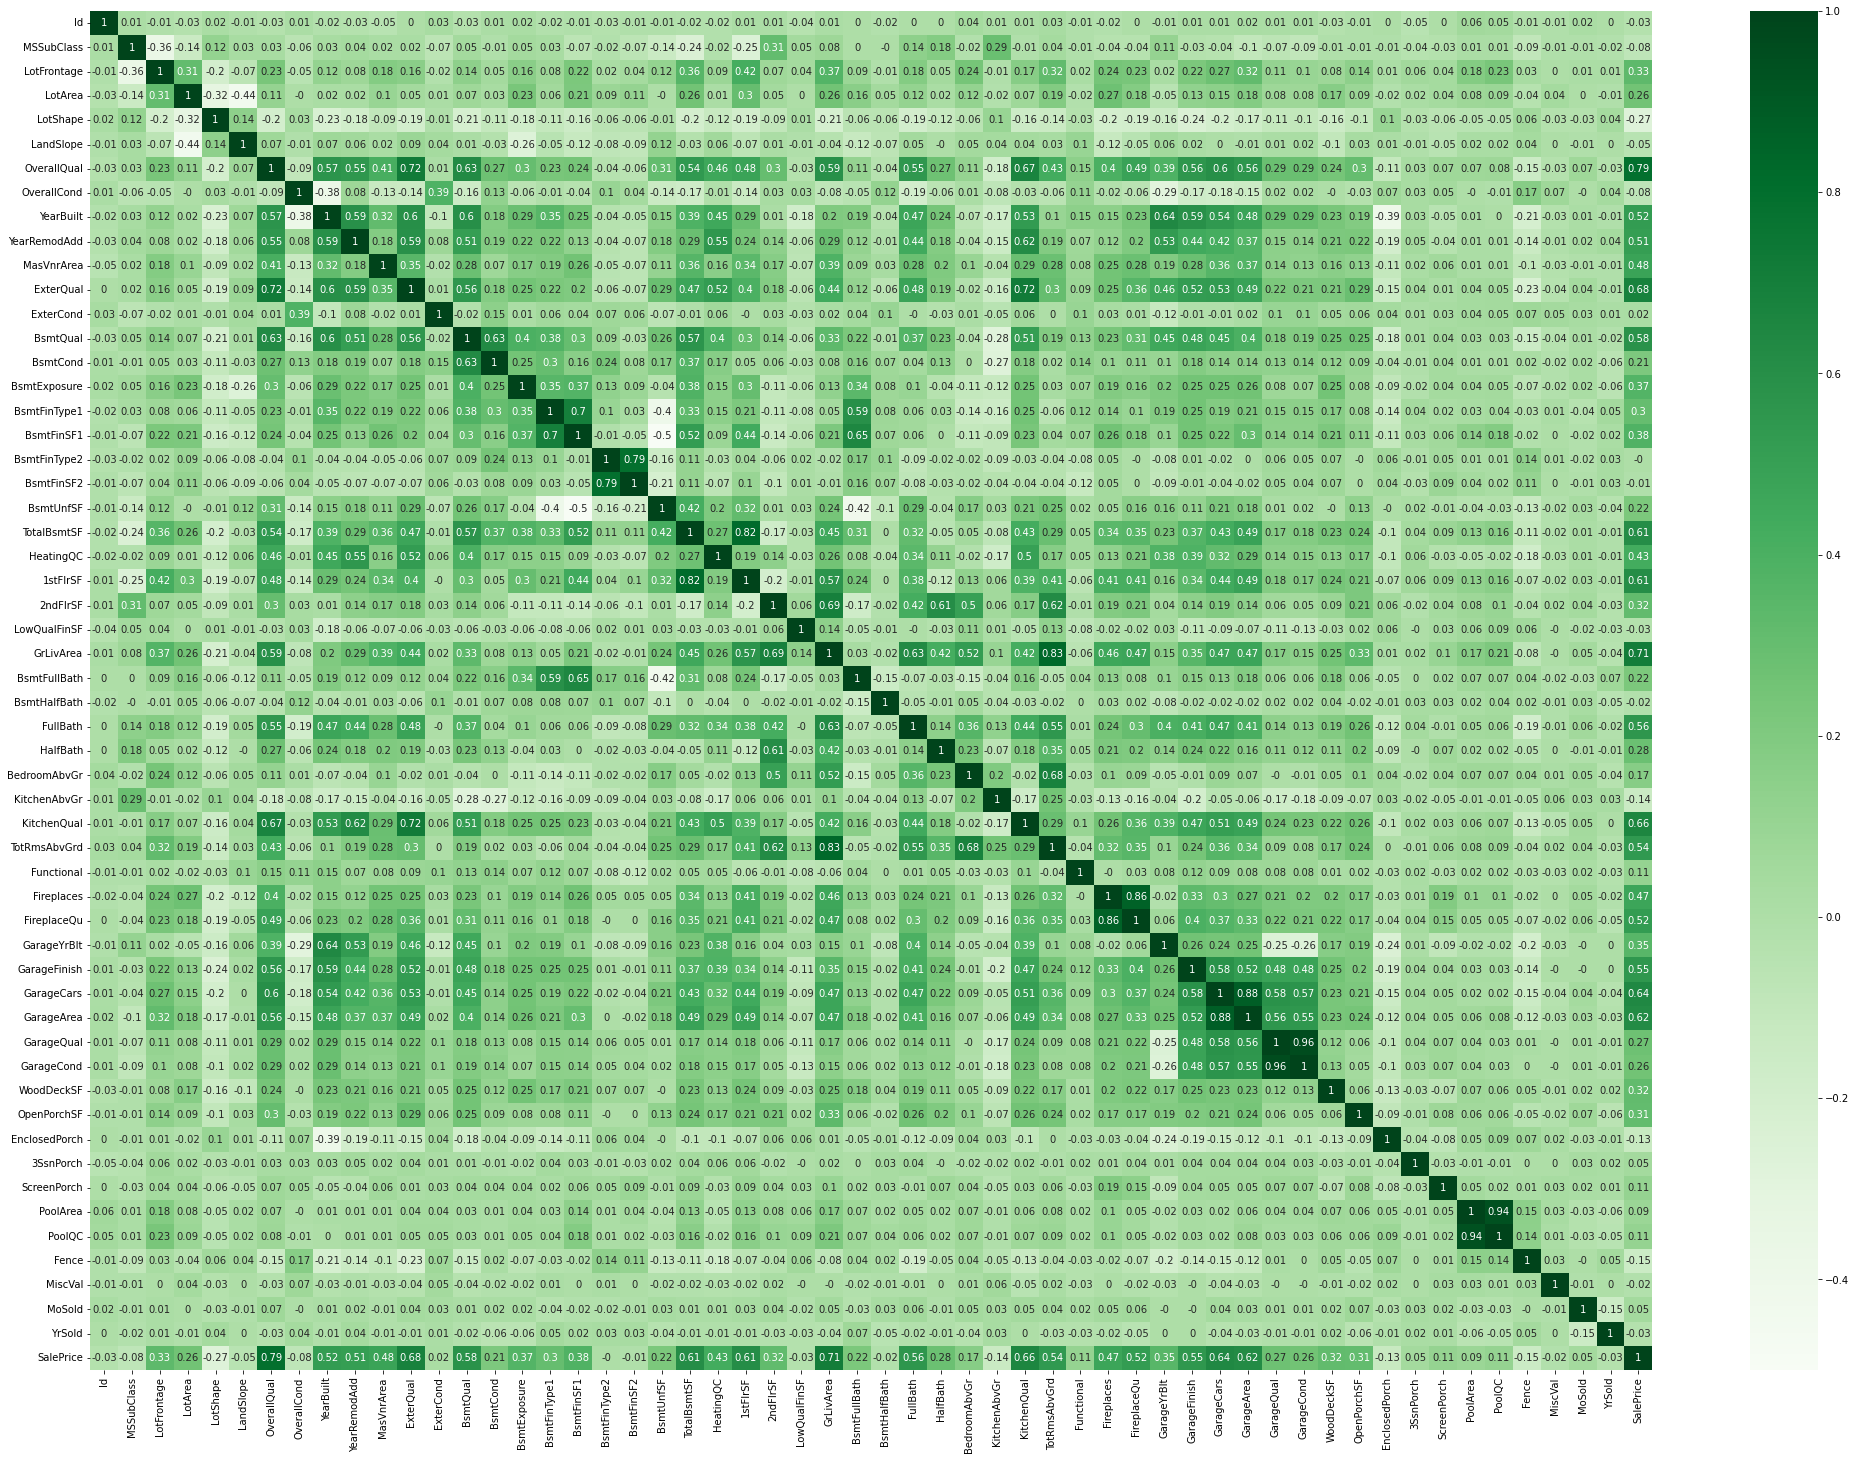

In [14]:
#Checking for corelation
cor = np.round(house_numeric.corr(),2)

#Plotting correlation heatmap to analyze the linearity between the variables 
plt.figure(figsize = (35, 25))
sns.heatmap(cor, annot = True, cmap="Greens")
plt.show()

In [15]:
# scaling the features - necessary before using Ridge or Lasso
#Lets scale the numeric columns

cols = house_numeric.columns
house_numeric = pd.DataFrame(scale(house_numeric))
house_numeric.columns = cols
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice
0,-1.727674,0.072441,-0.228363,-0.205996,0.702430,0.226451,0.656247,-0.520740,1.057250,0.883532,...,-0.359363,-0.116704,-0.271106,-0.068905,-0.066442,-0.471645,-0.087961,-1.600006,0.138985,0.351592
1,-1.725302,-0.872386,0.452424,-0.090876,0.702430,0.226451,-0.067870,2.174601,0.162613,-0.424340,...,-0.359363,-0.116704,-0.271106,-0.068905,-0.066442,-0.471645,-0.087961,-0.488657,-0.613506,0.011047
2,-1.722930,0.072441,-0.092205,0.074297,-1.013439,0.226451,0.656247,-0.520740,0.990980,0.835093,...,-0.359363,-0.116704,-0.271106,-0.068905,-0.066442,-0.471645,-0.087961,0.993142,0.138985,0.540783
3,-1.720558,0.308648,-0.455291,-0.095881,-1.013439,0.226451,0.656247,-0.520740,-1.858602,-0.714978,...,4.093291,-0.116704,-0.271106,-0.068905,-0.066442,-0.471645,-0.087961,-1.600006,-1.365998,-0.512382
4,-1.718186,0.072441,0.633967,0.375612,-1.013439,0.226451,1.380365,-0.520740,0.957846,0.738213,...,-0.359363,-0.116704,-0.271106,-0.068905,-0.066442,-0.471645,-0.087961,2.104491,0.138985,0.875021


In [16]:
#Dropping the columns for which we have scalled numeric values.
house = house.drop(list(house_numeric.columns), axis=1)


In [17]:
#Lets add the scaled numeric columns back to df
house= pd.concat([house, house_numeric.set_axis(house.index)], axis=1)
house.head()

,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,No Alley,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,...,-0.359363,-0.116704,-0.271106,-0.068905,-0.066442,-0.471645,-0.087961,-1.600006,0.138985,0.351592
1,RL,Pave,No Alley,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,...,-0.359363,-0.116704,-0.271106,-0.068905,-0.066442,-0.471645,-0.087961,-0.488657,-0.613506,0.011047
2,RL,Pave,No Alley,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,...,-0.359363,-0.116704,-0.271106,-0.068905,-0.066442,-0.471645,-0.087961,0.993142,0.138985,0.540783
3,RL,Pave,No Alley,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,...,4.093291,-0.116704,-0.271106,-0.068905,-0.066442,-0.471645,-0.087961,-1.600006,-1.365998,-0.512382
4,RL,Pave,No Alley,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,...,-0.359363,-0.116704,-0.271106,-0.068905,-0.066442,-0.471645,-0.087961,2.104491,0.138985,0.875021


In [18]:
# Seperating the Categorical columns from the data
house_categorical = house.select_dtypes(include=['object'])
house_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType',
       'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
# Convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True, dtype=int)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [20]:
#Dropping the columns for which we have dummy values.
house = house.drop(list(house_categorical.columns), axis=1)
house.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
#Lets add the dummy columns back to df
house= pd.concat([house, house_dummies], axis=1)
house.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=205)

In [22]:
house_A= house.drop(["Id", "SalePrice"], axis=1)

In [23]:
house_A.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.072441,-0.228363,-0.205996,0.702430,0.226451,0.656247,-0.520740,1.057250,0.883532,0.509503,...,0,0,0,0,1,0,0,0,1,0
1,-0.872386,0.452424,-0.090876,0.702430,0.226451,-0.067870,2.174601,0.162613,-0.424340,-0.573097,...,0,0,0,0,1,0,0,0,1,0
2,0.072441,-0.092205,0.074297,-1.013439,0.226451,0.656247,-0.520740,0.990980,0.835093,0.321705,...,0,0,0,0,1,0,0,0,1,0
3,0.308648,-0.455291,-0.095881,-1.013439,0.226451,0.656247,-0.520740,-1.858602,-0.714978,-0.573097,...,0,0,0,0,1,0,0,0,0,0
4,0.072441,0.633967,0.375612,-1.013439,0.226451,1.380365,-0.520740,0.957846,0.738213,1.360116,...,0,0,0,0,1,0,0,0,1,0


In [24]:
# Assigning X(independent variables) and y(dependent variable)
X = house_A
y = house["SalePrice"].values

<Axes: xlabel='SalePrice', ylabel='Density'>

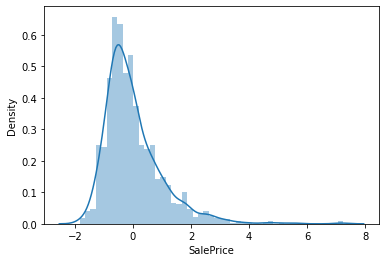

In [25]:
#Slightly skewed to the right
sns.distplot(house["SalePrice"])

In [26]:
#Lets split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 4. Model Building and Evaluation

In [27]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
# Print the coefficients and intercept
print(lm.intercept_)
lm.coef_

9075381913.655876


array([-4.14789609e-02,  3.46560556e-02,  6.28947145e-02, -7.88590419e-03,
        6.15971264e-03,  1.61131228e-01,  7.25118951e-02,  6.84586645e-02,
        2.66026571e-03,  5.99792356e-02,  2.05059193e-02, -3.71320911e-03,
        3.83252669e-02, -4.46476507e-02,  6.95871891e-02,  9.16926717e-04,
       -2.45861981e+11,  1.59700494e-02, -8.73464583e+10, -2.38756617e+11,
        2.36437895e+11,  4.85215382e-03,  6.84387226e+10,  7.75846969e+10,
        8.66971774e+09, -9.34670412e+10,  1.58592455e-02, -1.41055229e-02,
       -8.73018914e-03,  1.30779485e-02, -7.01398395e-02, -5.94082985e-02,
        4.75415267e-02,  4.61273193e-02,  5.42449951e-02,  4.87518311e-02,
       -4.96997833e-02,  4.55322266e-02,  1.21612549e-02,  7.14721680e-02,
       -1.50604248e-02,  7.55961537e-02, -4.69589233e-02,  1.26037598e-02,
        6.44683838e-03, -7.67064095e-03,  1.63574219e-02,  1.95312500e-02,
       -2.89916992e-03,  5.99212646e-02, -6.80160522e-03,  6.42776489e-02,
       -2.67028809e-04,  

In [29]:
#Function to generate score matrix
def score_Generator(y_pred_train, y_pred_test):
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print('r2_train: ',r2_train_lr)
    metric.append(r2_train_lr)
    
    r2_test_lr = r2_score(y_test, y_pred_test)
    print('r2_test: ', r2_test_lr)
    metric.append(r2_test_lr)
    
    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print('rss_train: ',rss1_lr)
    metric.append(rss1_lr)
    
    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print('rss_test: ',rss2_lr)
    metric.append(rss2_lr)
    
    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print('mse_train: ',mse_train_lr)
    metric.append(mse_train_lr**0.5)
    
    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print('mse_test: ',mse_test_lr)
    metric.append(mse_test_lr**0.5)
    return metric

In [30]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
metric=score_Generator(y_pred_train, y_pred_test)

r2_train:  0.9344076867511399
r2_test:  -3.0976096871928614e+17
rss_train:  66.34282485471518
rss_test:  1.360423797515441e+20
mse_train:  0.06536238901942382
mse_test:  3.1202380676959654e+17


#### There is lot variation in r2 scores on the unseen test data.

--> R-squared score suggests a good model fit, but the negative test R-squared value is a significant concern. 

--> Potential issues like incorrect calculations, data problems, or model overfitting.

--> Before doing regularisation for overfitting, let us do RFE and see if we can bring down multicolinearity and correct the data

### 4.1 RFE

In [31]:
lm1 = LinearRegression()
rfe1 = RFE(lm1, n_features_to_select=15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[False False False False False  True False False False False False False
 False False False False False False False False False False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False  True  True False  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

#### Lets see the new scores after RFE

In [32]:
y_pred_train = rfe1.predict(X_train)
y_pred_test = rfe1.predict(X_test)
metric1=score_Generator(y_pred_train, y_pred_test)


r2_train:  0.8184573456619056
r2_test:  0.6027742159554325
rss_train:  183.61987744991745
rss_test:  174.4556171280185
mse_train:  0.18090628320188912
mse_test:  0.40012756222022594


#### Improved Results

* Scores suggest a good model with a strong fit to the training data and some generalizability to unseen data.

* The R-squared values indicate a positive relationship between predicted and actual values.

* Test MSE value is higher than the train MSE, but it's still within a reasonable range and indicates some level of generalizability.


### 4.2 Regularisation 

* Performing Regularization might improve the results

### 4.2.1 Ridge Regression

In [33]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
list_alpha = [0.0001,0.001,0.01,0.1, 0.5, 1.0, 5.0, 20, 
 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 
 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 2000]
params = {'alpha': list_alpha}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)




Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 20,
                                   40, 70, 100, 150, 200, 250, 300, 350, 400,
                                   450, 500, 550, 600, 650, 700, 750, 800, 850,
                                   900, 950, 1000, 2000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [34]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<= 1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022068,0.008794,0.016877,0.009947,0.0001,{'alpha': 0.0001},-0.315212,-0.228771,-0.299334,-0.443959,...,-0.311730,0.072334,30,-0.164662,-0.181561,-0.176794,-0.168815,-0.168401,-0.172046,0.006186
1,0.023663,0.001069,0.012929,0.000434,0.001,{'alpha': 0.001},-0.315185,-0.228422,-0.298462,-0.415053,...,-0.305616,0.062095,29,-0.164669,-0.181529,-0.176693,-0.169582,-0.168297,-0.172154,0.006099
2,0.014849,0.001460,0.012838,0.005333,0.01,{'alpha': 0.01},-0.314923,-0.226979,-0.291529,-0.306991,...,-0.281888,0.031607,27,-0.164733,-0.181804,-0.176534,-0.175324,-0.168629,-0.173405,0.006034
3,0.015254,0.006497,0.007348,0.002175,0.1,{'alpha': 0.1},-0.312726,-0.237129,-0.273236,-0.266282,...,-0.272271,0.024118,26,-0.165339,-0.193585,-0.187856,-0.189957,-0.183296,-0.184007,0.009909
4,0.020433,0.012351,0.009481,0.004201,0.5,{'alpha': 0.5},-0.307524,-0.247007,-0.266056,-0.253435,...,-0.268555,0.021061,25,-0.167509,-0.206914,-0.203416,-0.205977,-0.198541,-0.196471,0.014770


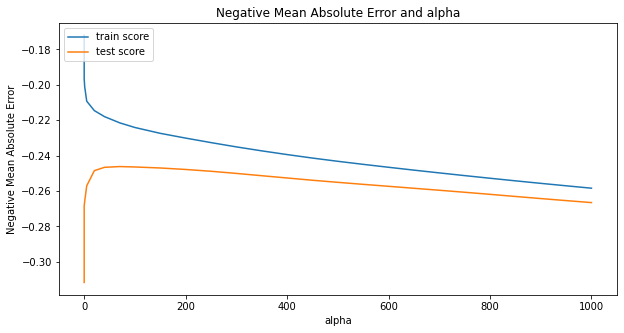

In [35]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(10,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [36]:
model_cv.best_params_

{'alpha': 70}

In [37]:
alpha = 70
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.08153851, -0.02659025,  0.03921356, -0.00327907, -0.01222356,
        0.200584  ,  0.05686779,  0.00533193, -0.00361203,  0.06573481,
        0.06508999, -0.00314252,  0.07915539, -0.04097329,  0.07414914,
        0.0530214 ,  0.00370784,  0.00413619, -0.00686251, -0.01171936,
       -0.01051385,  0.02245284,  0.0941097 ,  0.09527278,  0.0075216 ,
        0.14869057,  0.04805627, -0.01240251,  0.03353505,  0.03480458,
       -0.01159998, -0.03063421,  0.0624953 ,  0.0807726 ,  0.0468728 ,
        0.03846154,  0.00499205,  0.01893921,  0.01577336,  0.11298533,
        0.00926472,  0.02606531, -0.04318242,  0.03041981, -0.00756229,
        0.00292717,  0.01647365,  0.02571525, -0.01274479,  0.02003139,
       -0.00379267, -0.00795836,  0.00638473, -0.00437713,  0.01471603,
        0.01328409,  0.03670085, -0.03307707,  0.01668767,  0.00893692,
        0.00769919,  0.05444903,  0.00414898,  0.04987722, -0.00849511,
        0.0521217 , -0.02784957, -0.00617133, -0.01961508, -0.00

In [38]:
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)
mse = np.mean((pred - y_test)**2)
mse

0.1479487744095966

In [39]:
ridge.score(X_test,y_test)

0.8531241697343034

In [40]:
# Overall scores
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
metric2=score_Generator(y_pred_train, y_pred_test)


r2_train:  0.8594331387539017
r2_test:  0.8531241697343034
rss_train:  142.1752366111133
rss_test:  64.50566564258412
mse_train:  0.1400741247400131
mse_test:  0.1479487744095966


#### Improved results:

* Test R2 score shows very good fit! This suggests a strong and positive relationship between the predicted and actual values on the test set, indicating good generalizability of your model to unseen data.

* Lower MSE is better, and this value is slightly lower than the previous training MSE scores. It indicates a good fit for the training and test data.

* Overall these are excellent scores! They indicate a very well-fitting model that generalizes well to unseen data. Model looks strong based on these metrics.


### 4.2.2 Lasso Regression


In [41]:
lasso = Lasso()

params = {'alpha': list_alpha}

# cross validation
model_cv2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(X_train, y_train) 



Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 20,
                                   40, 70, 100, 150, 200, 250, 300, 350, 400,
                                   450, 500, 550, 600, 650, 700, 750, 800, 850,
                                   900, 950, 1000, 2000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [42]:
cv_results = pd.DataFrame(model_cv2.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.212486,0.054989,0.013381,0.000067,0.0001,{'alpha': 0.0001},-0.308762,-0.204369,-0.282596,-0.267277,...,-0.264109,0.034519,3,-0.166471,-0.182440,-0.177484,-0.178878,-0.170144,-0.175083,0.005879
1,0.121712,0.004728,0.013731,0.000076,0.001,{'alpha': 0.001},-0.291604,-0.229321,-0.240074,-0.239816,...,-0.250154,0.021729,1,-0.180669,-0.216939,-0.211909,-0.214340,-0.210399,-0.206851,0.013278
2,0.031841,0.002097,0.011029,0.001366,0.01,{'alpha': 0.01},-0.301338,-0.227972,-0.241386,-0.233689,...,-0.255220,0.027555,2,-0.209383,-0.244290,-0.240631,-0.243511,-0.238592,-0.235281,0.013109
3,0.021668,0.000445,0.010039,0.000250,0.1,{'alpha': 0.1},-0.331220,-0.277606,-0.280546,-0.281831,...,-0.294143,0.020067,4,-0.258194,-0.294051,-0.289844,-0.297256,-0.290293,-0.285928,0.014127
4,0.018396,0.000439,0.009919,0.000083,0.5,{'alpha': 0.5},-0.604346,-0.524602,-0.533766,-0.495436,...,-0.539811,0.035786,5,-0.532085,-0.541643,-0.534141,-0.531391,-0.552106,-0.538273,0.007816


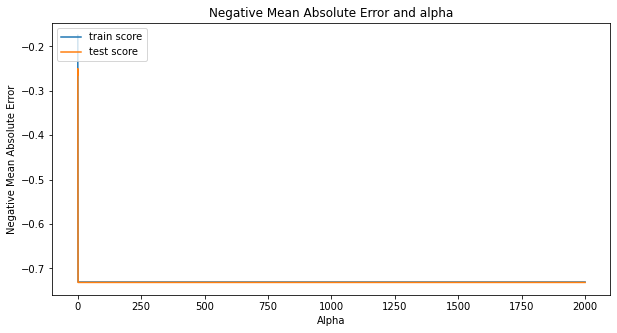

In [43]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(10,5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [44]:
model_cv2.best_params_

{'alpha': 0.001}

In [45]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [46]:
lasso.coef_

array([-7.92084454e-02, -2.94492023e-02,  4.67454147e-02,  6.91602680e-04,
       -6.57980120e-03,  1.99574142e-01,  5.98471483e-02,  5.74994419e-03,
       -7.67434854e-03,  5.64035389e-02,  3.41767485e-02, -0.00000000e+00,
        7.54967248e-02, -3.52543732e-02,  9.18800409e-02,  5.40540383e-02,
        0.00000000e+00,  5.74119600e-03, -1.10554276e-02, -1.23401374e-02,
       -4.66232030e-02,  1.46084212e-02,  0.00000000e+00,  1.67330795e-02,
       -1.12396663e-02,  3.69272696e-01,  5.35026387e-02, -3.58456416e-03,
        2.44619572e-02,  2.59663984e-02, -2.83559182e-02, -3.53325554e-02,
        5.01487588e-02,  6.20238467e-02,  4.29829080e-02,  3.86769166e-02,
       -1.85535589e-02,  1.98310275e-02,  1.76817835e-02,  1.40274676e-01,
       -4.39975742e-02,  5.57562613e-02, -5.70960953e-02,  2.00784467e-02,
        1.32346720e-03, -0.00000000e+00,  1.58847147e-02,  1.86710636e-02,
       -2.22712067e-03,  1.23437606e-02, -1.57058090e-03, -4.86728575e-03,
        5.31684835e-03, -

In [47]:
lasso.score(X_test,y_test)

0.8510081186376056

In [48]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8933687800591577


In [49]:
# Overall scores
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
metric3=score_Generator(y_pred_train, y_pred_test)

r2_train:  0.8933687800591577
r2_test:  0.8510081186376056
rss_train:  107.85130144350947
rss_test:  65.43500360295029
mse_train:  0.10625743984582214
mse_test:  0.15008028349300526


#### Slightly improved results:

* An excellent R-squared value, indicating a very strong fit between  predicted and actual values during training.The model has learned the training data very well.

* Lower MSE is better, and this value is slightly lower than the previous training MSE scores. It indicates a good fit for the training and test data.

* This is slightly higher than previous test MSE, but its still a low value and comparable to train MSE. It suggests the model generalizes well to unseen data with minimal error.


In [50]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rfe_metric= pd.Series(metric1, name = 'RFE Regression')
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rfe_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,RFE Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.344077e-01,0.818457,0.859433,0.893369
1,R2 Score (Test),-3.097610e+17,0.602774,0.853124,0.851008
2,RSS (Train),6.634282e+01,183.619877,142.175237,107.851301
3,RSS (Test),1.360424e+20,174.455617,64.505666,65.435004
4,MSE (Train),2.556607e-01,0.425331,0.374265,0.325972
5,MSE (Test),5.585909e+08,0.632556,0.384641,0.387402


#### Lets observe the changes in the coefficients after regularization

In [51]:
betas = pd.DataFrame(index=X.columns)

In [52]:
betas.rows = X.columns

In [53]:
# Coefficients of RFE is different for each iterations (since finally selected only 15 features), hence not 
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [54]:
pd.set_option('display.max_rows', None)
betas.head(20)

,Linear,Ridge,Lasso
MSSubClass,-4.147896e-02,-0.081539,-0.079208
LotFrontage,3.465606e-02,-0.026590,-0.029449
LotArea,6.289471e-02,0.039214,0.046745
LotShape,-7.885904e-03,-0.003279,0.000692
LandSlope,6.159713e-03,-0.012224,-0.006580
OverallQual,1.611312e-01,0.200584,0.199574
OverallCond,7.251190e-02,0.056868,0.059847
YearBuilt,6.845866e-02,0.005332,0.005750
YearRemodAdd,2.660266e-03,-0.003612,-0.007674
MasVnrArea,5.997924e-02,0.065735,0.056404


#### Conclusion:
As we can see there is not much difference in the model performances in the three cases, however lasso regression model performs ever so slightly better than the other two models. The most important predictor values determined from the besta-coefficients were as follows- 
1. RoofMatl_WdShngl : 0.655780
2. Neighborhood_NridgHt : 0.499205
3. Neighborhood_NoRidge : 0.466566
4. Neighborhood_StoneBr : 0.381173
5. GrLivArea : 0.369273

### End of doc